#Trần hoàn Đức Duy - 19521434

#Import packages

In [3]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Add
from keras.models import load_model, Model
import numpy as np

#Data preprocessing

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [5]:
def onehot(y):
    oh = np.zeros((y.shape[0], 10))
    for i in range(y.shape[0]):
        oh[i, int(y[i])] = 1
    return oh

In [6]:
y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

x_train_norm = x_train_norm[:,:,:, np.newaxis]
x_test_norm = x_test_norm[:,:,:, np.newaxis]

#Define model

In [9]:
class MiniResNet:
    def __init__(self):
        self.model = None

    def build(self, input_dim):
        input = Input(shape=input_dim)
        conv1 = Conv2D(8, (3, 3), padding='same', activation=None)(input)
        p1 = MaxPooling2D((2, 2), strides=(2, 2))(conv1)
    
        conv2 = Conv2D(8, (3, 3), padding='same', activation='relu')(p1)
        conv3 = Conv2D(8, (3, 3), padding='same', activation='relu')(conv2)
        skip1 = p1 + conv3

        conv4 = Conv2D(16, (3, 3), padding='same', strides=(2, 2), activation='relu')(skip1)
        conv5 = Conv2D(16, (3, 3), padding='same', activation='relu')(conv4)
        conv6 = Conv2D(16, (3, 3), padding='same', activation='relu')(conv5)
        skip2 = conv4 + conv6
        
        p2 = AveragePooling2D((2, 2), padding='same', strides=(1, 1))(skip2)
        flatten = Flatten()(p2)
        fc1 = Dense(400, activation='sigmoid')(flatten)
        output = Dense(10, activation='softmax')(fc1)

        self.model = Model(input, output)
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train,validation_split=0.2, verbose=1, epochs=10, batch_size=128):
        self.model.fit(x_train, y_train, validation_split=validation_split, verbose=verbose, epochs=epochs, batch_size=batch_size)

    def load(self, model_file):
        self.model = load_file(model_file)

    def save(self, model_file):
        self.model.save(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
      return self.model.predict(x_test)

In [10]:
model = MiniResNet()
model.build((28, 28, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 8)    80          ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 8)   0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d_1[0][0]']        
                                                                                            

#Train and predict

In [11]:
model.train(x_train_norm, y_train_oh)

Epoch 1/10
375/375 [==============================] - 18s 6ms/step - loss: 0.4023 - accuracy: 0.8739 - val_loss: 0.1392 - val_accuracy: 0.9551
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1056 - accuracy: 0.9680 - val_loss: 0.0811 - val_accuracy: 0.9768
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.0728 - val_accuracy: 0.9781
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0594 - val_accuracy: 0.9826
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0557 - val_accuracy: 0.9829
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch

In [15]:
y_pred = model.predict(x_test_norm)
print('predictions: ',np.argmax(y_pred[:10],axis = 1))

predictions:  [7 2 1 0 4 1 4 9 5 9]


#Visualization

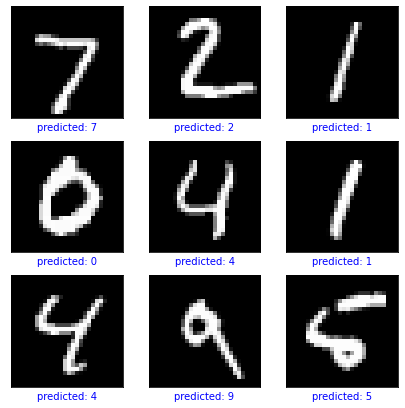

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i],cmap='gray')
  label = np.argmax(y_pred[i])
  if label == y_test[i]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel('predicted: ' +str(label),color = color)
plt.show()